In [1]:
# import nec

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

import warnings
warnings.filterwarnings('ignore')

# get the csv data here and print head

In [4]:
df=pd.read_csv('breast cancer.csv',index_col=0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# label = diagnosis

# print summary

In [5]:
print('shape ------>',df.shape)
print('each column and data type and its count','\n')
print(df.info())

shape ------> (569, 32)
each column and data type and its count 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimet

# info () me float64 aaya to maximun time this is continues data
# info () object aaya to categorical data

# drop alert 1 : unnamed:32 column all nuiis sefe to remove the column

In [7]:
df=df.drop(['Unnamed: 32'],axis=1)

In [8]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


# Dataframe statsstic

In [2]:
# Dataframe staticstis
df.describe()

NameError: name 'df' is not defined

In [10]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# ^ imbalance dataset

# ^ * dataset is not imbalance we are good to proceed

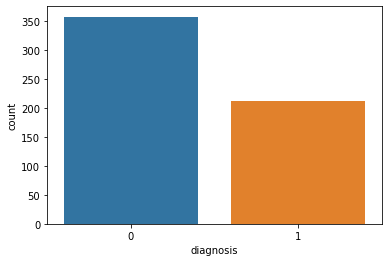

In [36]:
# pkot each class freequency
sns.countplot(x='diagnosis',data=df)
plt.show()

In [13]:
df.shape

(569, 31)

# * Using selectKbest feature selection method 

# selectkbest use f_classif function to find best feature,where f_classif user anova test

In [17]:
from sklearn.feature_selection import SelectKBest,f_classif

In [18]:
df['diagnosis']=df['diagnosis'].replace({'M':1,'B':0})

In [19]:
x=df.drop('diagnosis',axis=1)
y=df.diagnosis

In [23]:
best_features=SelectKBest(score_func=f_classif, k=17)

fit=best_features.fit(x,y)
df_score=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)

# Concatenate dataframe

feature_score=pd.concat([df_columns,df_score],axis=1)

feature_score.columns=['feature_name','score'] # Name output column

print(feature_score.nlargest(17, 'score')) # print 17 best feature

            feature_name       score
27  concave points_worst  964.385393
22       perimeter_worst  897.944219
7    concave points_mean  861.676020
20          radius_worst  860.781707
2         perimeter_mean  697.235272
23            area_worst  661.600206
0            radius_mean  646.981021
3              area_mean  573.060747
6         concavity_mean  533.793126
26       concavity_worst  436.691939
5       compactness_mean  313.233079
25     compactness_worst  304.341063
10             radius_se  268.840327
12          perimeter_se  253.897392
13               area_se  243.651586
21         texture_worst  149.596905
24      smoothness_worst  122.472880


# * Model  Building

In [25]:
new_x=df[['concave points_worst','perimeter_worst','concave points_mean','radius_worst','perimeter_mean','area_worst','radius_mean','area_mean','concavity_mean','concavity_worst','compactness_mean','compactness_worst','radius_se','perimeter_se','area_se','texture_worst','smoothness_worst']]

In [26]:
new_x

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,compactness_mean,compactness_worst,radius_se,perimeter_se,area_se,texture_worst,smoothness_worst
id,,,,,,,,,,,,,,,,,
842302,0.2654,184.60,0.14710,25.380,122.80,2019.0,17.99,1001.0,0.30010,0.7119,0.27760,0.66560,1.0950,8.589,153.40,17.33,0.16220
842517,0.1860,158.80,0.07017,24.990,132.90,1956.0,20.57,1326.0,0.08690,0.2416,0.07864,0.18660,0.5435,3.398,74.08,23.41,0.12380
84300903,0.2430,152.50,0.12790,23.570,130.00,1709.0,19.69,1203.0,0.19740,0.4504,0.15990,0.42450,0.7456,4.585,94.03,25.53,0.14440
84348301,0.2575,98.87,0.10520,14.910,77.58,567.7,11.42,386.1,0.24140,0.6869,0.28390,0.86630,0.4956,3.445,27.23,26.50,0.20980
84358402,0.1625,152.20,0.10430,22.540,135.10,1575.0,20.29,1297.0,0.19800,0.4000,0.13280,0.20500,0.7572,5.438,94.44,16.67,0.13740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,0.2216,166.10,0.13890,25.450,142.00,2027.0,21.56,1479.0,0.24390,0.4107,0.11590,0.21130,1.1760,7.673,158.70,26.40,0.14100
926682,0.1628,155.00,0.09791,23.690,131.20,1731.0,20.13,1261.0,0.14400,0.3215,0.10340,0.19220,0.7655,5.203,99.04,38.25,0.11660
926954,0.1418,126.70,0.05302,18.980,108.30,1124.0,16.60,858.1,0.09251,0.3403,0.10230,0.30940,0.4564,3.425,48.55,34.12,0.11390


In [28]:
scalar=StandardScaler()
x_scalar=scalar.fit_transform(new_x)

# Building model to  test unexposed data 

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x_scalar,y,test_size=0.25,random_state=355)

# Write one function and call as many astime to check accuracy_score of different models

In [30]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print("\n===========train Result=============")
        print(f"accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train == False:
        pred=clf.predict(x_test)
        
        print("\n=============test Result=============")
        print(f"accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
        
        print("\n \n test classification report \n",classification_report(y_test,pred,digits=2))

# Infitiate KNeighorsclassifier

In [35]:
knn=KNeighborsClassifier()
knn.fit(x_train, y_train) # model training

KNeighborsClassifier()

# Call the function and pass datset to check train and test score

In [34]:
metric_score(knn, x_train, x_test, y_train, y_test, train=True) # This is for training score

metric_score(knn, x_train, x_test, y_train, y_test, train=False) # This is for testing score


===========train Result=============
accuracy score:98.83%

=============test Result=============
accuracy score:95.80%

 
 test classification report 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        93
           1       0.96      0.92      0.94        50

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143

